###### Start by importing all necessary packages

In [1]:
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.core.common import SettingWithCopyWarning
import sklearn 
 
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

###### Read the loans.csv file into a pandas dataframe called "df"

In [5]:
# Read the file loan.csv into a Pandas dataframe object, df. 
# YOUR CODE HERE
df= pd.read_csv("loans.csv")
print (df)

      default  installment  log_income  fico_score  rev_balance  inquiries  \
0           0          829        4.93         737        28.85          0   
1           0          228        4.81         707        33.62          0   
2           0          367        4.51         682         3.51          1   
3           0          162        4.93         712        33.67          1   
4           0          103        4.91         667         4.74          0   
...       ...          ...         ...         ...          ...        ...   
9511        1          345        5.29         672       215.37          2   
9512        1          258        4.84         722         0.18          5   
9513        1           98        4.60         687        10.04          8   
9514        1          352        4.70         692         0.00          5   
9515        1          853        4.89         732        37.88          6   

      records  
0           0  
1           0  
2           0  

###### Extract the two columns you will be focusing on "default" and "fico_score" 

In [6]:
#Extract everything besided "default" and "fico_score" from the dataframe
# YOUR CODE HERE
# Assuming 'df' is your DataFrame
df_filtered = df.drop(columns=["default", "fico_score"])

# Display the resulting DataFrame
print(df_filtered)

      installment  log_income  rev_balance  inquiries  records
0             829        4.93        28.85          0        0
1             228        4.81        33.62          0        0
2             367        4.51         3.51          1        0
3             162        4.93        33.67          1        0
4             103        4.91         4.74          0        0
...           ...         ...          ...        ...      ...
9511          345        5.29       215.37          2        0
9512          258        4.84         0.18          5        0
9513           98        4.60        10.04          8        0
9514          352        4.70         0.00          5        0
9515          853        4.89        37.88          6        0

[9516 rows x 5 columns]


###### Examine the data

In [7]:
df.head(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
5,0,125,5.17,727,50.81,0,0


In [8]:
df.tail(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
9510,1,70,4.39,662,3.00,6,0
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0
9515,1,853,4.89,732,37.88,6,0


###### use df.loc[] to grab all the columns where default = 1/ there was a default. Assign this to "default_df"

In [10]:
# Use df.loc[] to extract all rows where a loan defaulted.
# Set the resulting dataset to default_df to be displayed
# YOUR CODE HERE
# Extract all rows where the 'default' column equals 1
default_df = df.loc[df['default'] == 1]

# Display the resulting dataframe
print('\nResult dataframe :\n', default_df)
  



Result dataframe :
       default  installment  log_income  fico_score  rev_balance  inquiries  \
6           1          194        4.65         667         3.84          0   
7           1          131        4.78         722        24.22          0   
57          1          678        5.16         682        41.67          0   
65          1           33        4.53         687         4.49          1   
73          1          225        5.33         677        56.41          0   
...       ...          ...         ...         ...          ...        ...   
9511        1          345        5.29         672       215.37          2   
9512        1          258        4.84         722         0.18          5   
9513        1           98        4.60         687        10.04          8   
9514        1          352        4.70         692         0.00          5   
9515        1          853        4.89         732        37.88          6   

      records  
6           1  
7         

###### Use df.loc[] to grab all rows where a loan did not default and assign the output to no_default_df. 

In [12]:
#Use df.loc[] to extract all rows where a loan did not default.
# Set the resulting dataset to no_default_df to be displayed
# YOUR CODE HERE
# Extract all rows where the 'default' column equals 0 (indicating no default)
no_default_df = df.loc[df['default'] == 0]

# Display the resulting dataframe

print('\nResult dataframe :\n', no_default_df)


Result dataframe :
       default  installment  log_income  fico_score  rev_balance  inquiries  \
0           0          829        4.93         737        28.85          0   
1           0          228        4.81         707        33.62          0   
2           0          367        4.51         682         3.51          1   
3           0          162        4.93         712        33.67          1   
4           0          103        4.91         667         4.74          0   
...       ...          ...         ...         ...          ...        ...   
9499        0          116        4.78         722        11.59          4   
9500        0          509        4.75         717         8.76          6   
9502        0          512        5.35         687       385.49          4   
9505        0          101        4.76         687         1.51          5   
9506        0           37        4.62         667        28.85          6   

      records  
0           0  
1         

###### Examine the resulting dataframes 

In [13]:
no_default_df.describe()

,default,installment,log_income,fico_score,rev_balance,inquiries,records
count,7995.0,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000
mean,0.0,315.542464,4.752088,713.307067,16.181555,1.428143,0.056535
std,0.0,203.361193,0.260654,38.209948,29.542831,1.997417,0.255646
min,0.0,16.000000,3.280000,612.000000,0.000000,0.000000,0.000000
25%,0.0,163.000000,4.600000,682.000000,3.250000,0.000000,0.000000
50%,0.0,268.000000,4.750000,707.000000,8.630000,1.000000,0.000000
75%,0.0,425.500000,4.910000,742.000000,18.000000,2.000000,0.000000
max,0.0,940.000000,6.310000,827.000000,952.010000,31.000000,5.000000


In [14]:
default_df.describe()

,default,installment,log_income,fico_score,rev_balance,inquiries,records
count,1521.0,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000
mean,1.0,344.319527,4.730618,697.884287,21.232939,2.333991,0.092045
std,0.0,224.068429,0.286276,33.764233,50.066968,2.938440,0.293699
min,1.0,16.000000,3.300000,617.000000,0.000000,0.000000,0.000000
25%,1.0,169.000000,4.560000,672.000000,3.400000,0.000000,0.000000
50%,1.0,290.000000,4.730000,692.000000,8.940000,1.000000,0.000000
75%,1.0,492.000000,4.900000,717.000000,20.700000,3.000000,0.000000
max,1.0,927.000000,5.850000,822.000000,1207.360000,33.000000,2.000000


###### Fill in the code to display a scatter plot of fico_score vs defaults. Set alpha =0.1 and s=200

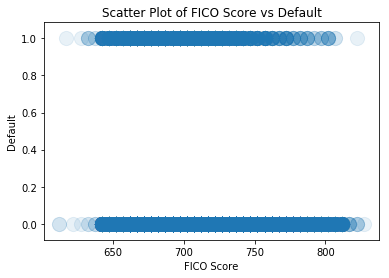

In [15]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(df['fico_score'], df['default'], alpha=0.1, s=200)

# Add labels and a title
plt.xlabel('FICO Score')
plt.ylabel('Default')
plt.title('Scatter Plot of FICO Score vs Default')

# Show the plot
plt.show()

###### Split the dataframe inot train and test sets called df_train and df_test

In [16]:
# Data split into 70% train and 30% test. 
# The dataframes should be called df_train and df_test
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Split the data: 70% for training and 30% for testing
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Display the shape of the resulting dataframes
print(f"Training set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")

Training set shape: (6661, 7)
Test set shape: (2855, 7)


###### Examine the training set

In [17]:
df_train.describe()

,default,installment,log_income,fico_score,rev_balance,inquiries,records
count,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000
mean,0.159285,317.735775,4.746588,710.142171,16.666511,1.582645,0.063204
std,0.365969,205.260141,0.262403,37.858862,33.348172,2.219412,0.264629
min,0.000000,16.000000,3.280000,612.000000,0.000000,0.000000,0.000000
25%,0.000000,165.000000,4.590000,682.000000,3.340000,0.000000,0.000000
50%,0.000000,269.000000,4.740000,707.000000,8.640000,1.000000,0.000000
75%,0.000000,426.000000,4.900000,737.000000,18.120000,2.000000,0.000000
max,1.000000,940.000000,6.160000,822.000000,1207.360000,33.000000,5.000000


###### Create a formula and your modle based on training data

In [23]:
# build formula,  target (depedent variable) ~ features (indepedent variables)
# build model, fit the formula to the training data using a logistic algorithim (logit). 
# Set the output to "est"
# YOUR CODE HERE
import statsmodels.formula.api as smf

# Define the formula: "default" is the target (dependent variable) and all other features are independent variables
# Replace "feature1 + feature2 + ... + featureN" with your actual feature names
formula = 'default ~ fico_score + log_income + rev_balance'

# Fit the logistic regression model using the training data
est = smf.logit(formula, data=df_train).fit()



# print the results of the model (est).
# Examine; Pseudo R-squared, p values, coefficients 
print(est.summary())

Optimization terminated successfully.
         Current function value: 0.425071
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6657
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                 0.03059
Time:                        02:25:23   Log-Likelihood:                -2831.4
converged:                       True   LL-Null:                       -2920.7
Covariance Type:            nonrobust   LLR p-value:                 1.704e-38
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.9182      0.919      9.706      0.000       7.117      10.719
fico_score     -0.0115    

###### Use your model to make predictions based on the test set

In [29]:
# Use your model to create a predicted probability of default from the df_test dataframe 
# Assign a new calumn "predicted_probability" to the predicted output
# YOUR CODE HERE
# Use the logistic model to predict the probability of default on the test data
df_test['predicted_probability'] = est.predict(df_test)

# Display the first 6 rows of the df_test DataFrame with the new column
df_test.head(6)



,default,installment,log_income,fico_score,rev_balance,inquiries,records,predicted_probability,predicted_label
8379,0,108,4.65,647,14.98,1,0,0.275631,0
5955,0,158,4.77,742,6.67,0,0,0.103552,0
6681,0,683,5.03,742,4.59,0,0,0.090523,0
2737,0,167,5.02,707,70.43,0,0,0.164830,0
3529,0,343,4.70,727,10.17,0,0,0.126373,0
6383,0,562,4.70,732,21.59,0,0,0.125326,0


###### Next, create a new column called "will default" that observes the predicted probability and flags a loan as a potential to default or not. Experiment with the predicted probability threshold to optimise the model. 

In [30]:
# Create a new column called "will_default". Play around with the predicted probability threshold. 
# A good starting threshold for a 1 flag is 25%
#If yes assign will_default to 1, otherwise to 0
# YOUR CODE HERE
# Use the logistic model to predict the probability of default on the test data
# Create the 'will_default' column
# If the predicted probability is greater than or equal to 25%, assign 1 (default), otherwise assign 0
df_test['will_default'] = (df_test['predicted_probability'] >= 0.25).astype(int)

# Display the first 6 rows of the df_test dataframe
df_test.head(6)

print(df_test)

      default  installment  log_income  fico_score  rev_balance  inquiries  \
8379        0          108        4.65         647        14.98          1   
5955        0          158        4.77         742         6.67          0   
6681        0          683        5.03         742         4.59          0   
2737        0          167        5.02         707        70.43          0   
3529        0          343        4.70         727        10.17          0   
...       ...          ...         ...         ...          ...        ...   
4078        1          856        5.07         712        26.44          1   
1128        1          243        4.62         702         3.61          1   
4549        0           73        4.60         732         1.96          0   
6885        0          170        4.36         677         1.56          1   
2208        0          497        5.19         752         6.08          1   

      records  predicted_probability  predicted_label  will_def

###### Create a confusion matrix so you can observe your model's performance on the test data. It should be examining predicted vs actual default values (will_default vs default). 

In [31]:
# Create a confusion matrix displaying actual vs predicted values. 
# Assign the output to "matrix"
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix

# Create predicted labels (0 or 1) based on a probability threshold (e.g., 0.5)
df_test['predicted_label'] = (df_test['predicted_probability'] >= 0.5).astype(int)

# Generate the confusion matrix
matrix = confusion_matrix(df_test['default'], df_test['predicted_label'])

# Display the confusion matrix
print(matrix)
print(matrix)

[[2394    1]
 [ 459    1]]
[[2394    1]
 [ 459    1]]


###### Execute the follwoing cells to view a heatmap of the confusion matrix and accuracy of your model. Use these to answer the follow-up questions for the assignment.

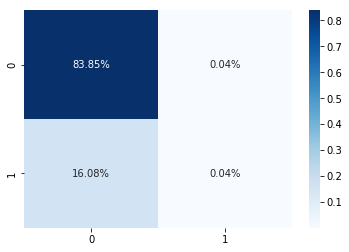

In [32]:
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')

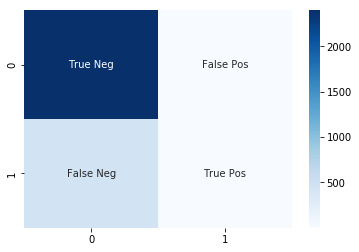

In [33]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt="", cmap='Blues')

###### Finally, observe the accuracy of the model. 

In [34]:

print('Accuracy:'+str(accuracy_score(df_test['default'], df_test['will_default'])))

Accuracy:0.8178633975481612
